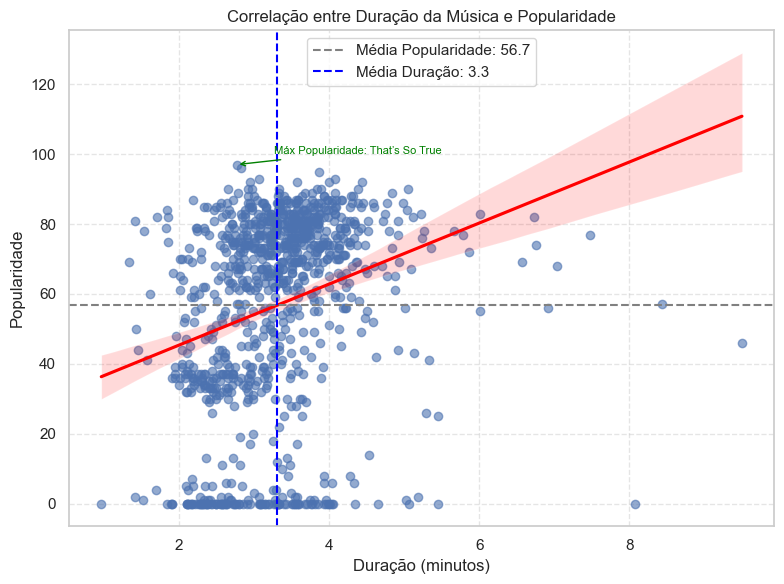

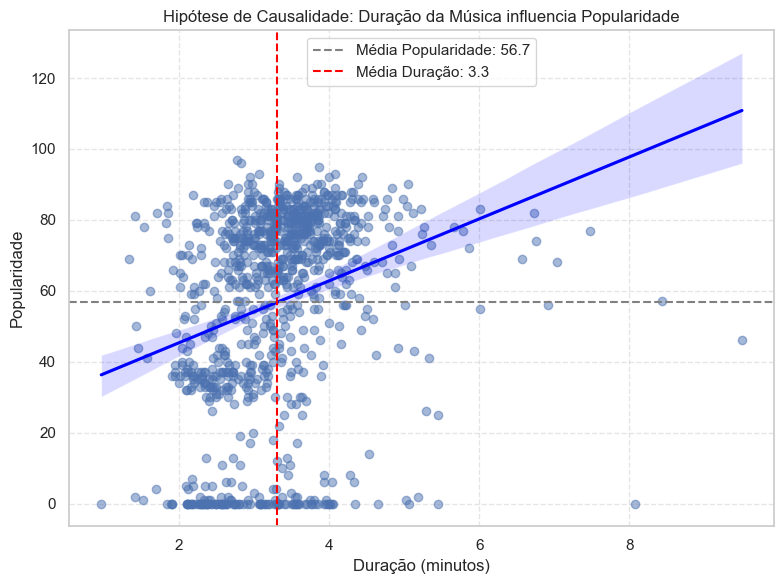

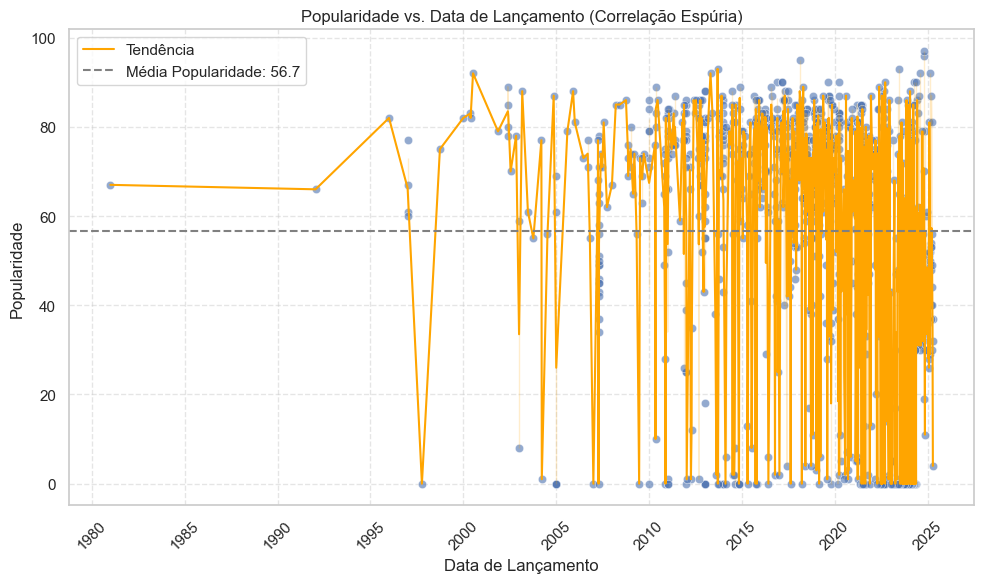

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura e preparação
df = pd.read_csv('spotify_top_1000_tracks.csv')
df = df.rename(columns={
    'track_name': 'Nome_Da_Faixa',
    'artist': 'Artista',
    'album': 'Álbum',
    'release_date': 'Data_De_Lançamento',
    'popularity': 'Popularidade',
    'spotify_url': 'Spotify_URL',
    'id': 'ID',
    'duration_min': 'Duração_Mínima'
})
df['Data_De_Lançamento'] = pd.to_datetime(df['Data_De_Lançamento'], errors='coerce')
df['Popularidade'] = pd.to_numeric(df['Popularidade'], errors='coerce')
df['Duração_Mínima'] = pd.to_numeric(df['Duração_Mínima'], errors='coerce')
df = df.dropna(subset=['Data_De_Lançamento', 'Popularidade', 'Duração_Mínima'])

# Estatísticas
media_pop = df['Popularidade'].mean()
media_dur = df['Duração_Mínima'].mean()

sns.set(style="whitegrid")

# 1. Correlação: Duração x Popularidade
plt.figure(figsize=(8, 6))
sns.regplot(x='Duração_Mínima', y='Popularidade', data=df,
            scatter_kws={'alpha': 0.6},
            line_kws={'color': 'red'})
plt.axhline(media_pop, linestyle='--', color='gray', label=f'Média Popularidade: {media_pop:.1f}')
plt.axvline(media_dur, linestyle='--', color='blue', label=f'Média Duração: {media_dur:.1f}')
plt.title('Correlação entre Duração da Música e Popularidade')
plt.xlabel('Duração (minutos)')
plt.ylabel('Popularidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Anotar ponto mais popular
max_row = df[df['Popularidade'] == df['Popularidade'].max()].iloc[0]
plt.annotate(f'Máx Popularidade: {max_row["Nome_Da_Faixa"]}', 
             xy=(max_row['Duração_Mínima'], max_row['Popularidade']),
             xytext=(max_row['Duração_Mínima'] + 0.5, max_row['Popularidade'] + 3),
             arrowprops=dict(arrowstyle='->', color='green'), color='green', fontsize=8)

plt.tight_layout()
plt.show()

# 2. Hipótese de Causalidade
plt.figure(figsize=(8, 6))
sns.regplot(x='Duração_Mínima', y='Popularidade', data=df,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'blue'})
plt.axhline(media_pop, linestyle='--', color='gray', label=f'Média Popularidade: {media_pop:.1f}')
plt.axvline(media_dur, linestyle='--', color='red', label=f'Média Duração: {media_dur:.1f}')
plt.title('Hipótese de Causalidade: Duração da Música influencia Popularidade')
plt.xlabel('Duração (minutos)')
plt.ylabel('Popularidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Correlação Espúria – Data de Lançamento x Popularidade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Data_De_Lançamento', y='Popularidade', data=df, alpha=0.6)
sns.lineplot(x='Data_De_Lançamento', y='Popularidade', data=df.sort_values('Data_De_Lançamento'), color='orange', label='Tendência')
plt.axhline(media_pop, linestyle='--', color='gray', label=f'Média Popularidade: {media_pop:.1f}')
plt.title('Popularidade vs. Data de Lançamento (Correlação Espúria)')
plt.xlabel('Data de Lançamento')
plt.ylabel('Popularidade')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### Correlação: Duração e popularidade estão correlacionadas de forma leve.
                  Correlação muito fraca, praticamente nula

### Causalidade: A duração das músicas afeta sua aceitação no mercado e, consequentemente, sua popularidade (existe uma faixa ideal de duração).
                    Hipótese não confirmada; sem impacto visível

### Correlação espúria: Músicas lançadas recentemente tendem a ser menos populares, não por serem piores, mas por estarem há menos tempo na plataforma.
                Correlação aparente, mas causada por fatores externos (tendência de consumo)

In [2]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv('spotify_top_1000_tracks.csv')

# Exibir as colunas disponíveis
print(df.columns)


Index(['track_name', 'artist', 'album', 'release_date', 'popularity',
       'spotify_url', 'id', 'duration_min'],
      dtype='object')
